En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

 - Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

 - Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None # recordamos que este comando nos pe


In [2]:
df = pd.read_csv("Datos/possum2.csv", index_col = 0)
df.head(2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


In [3]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
numericas.drop(["case", "site", "hdlngth"], axis = 1, inplace = True)

numericas.head(2)

,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(numericas)

StandardScaler()

In [7]:
X_escaladas = scaler.transform(numericas)

In [8]:
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(5)

,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,2.218955,1.134883,0.445603,-0.517732,1.231614,1.557431,0.147177,0.491222,1.241874
1,1.157937,0.231197,1.028384,-0.261331,0.810757,0.750501,0.912499,0.736833,0.150424
2,1.157937,1.005785,1.960834,1.020671,1.421000,0.921668,0.434173,1.473667,0.514241
3,1.157937,0.069825,1.144941,0.507870,1.568300,0.995025,0.147177,0.491222,0.514241
4,-0.964098,-0.188371,-0.370290,-0.517732,0.495114,1.239549,0.051512,0.736833,0.150424


In [9]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna age es:  -5.177482374453855e-17
La desviación estándar de la columna age es: 1.0048426433348048
-------------------------------------------------------------
La media de la columna skullw es:  1.6877525018580504e-15
La desviación estándar de la columna skullw es: 1.004842643334805
-------------------------------------------------------------
La media de la columna totlngth es:  -1.468910463350207e-15
La desviación estándar de la columna totlngth es: 1.004842643334805
-------------------------------------------------------------
La media de la columna taill es:  -1.1529239101876626e-15
La desviación estándar de la columna taill es: 1.0048426433348048
-------------------------------------------------------------
La media de la columna footlgth es:  -9.693101022688866e-16
La desviación estándar de la columna footlgth es: 1.0048426433348048
-------------------------------------------------------------
La media de la columna earconch es:  -1.9535655144846504e-16
La de

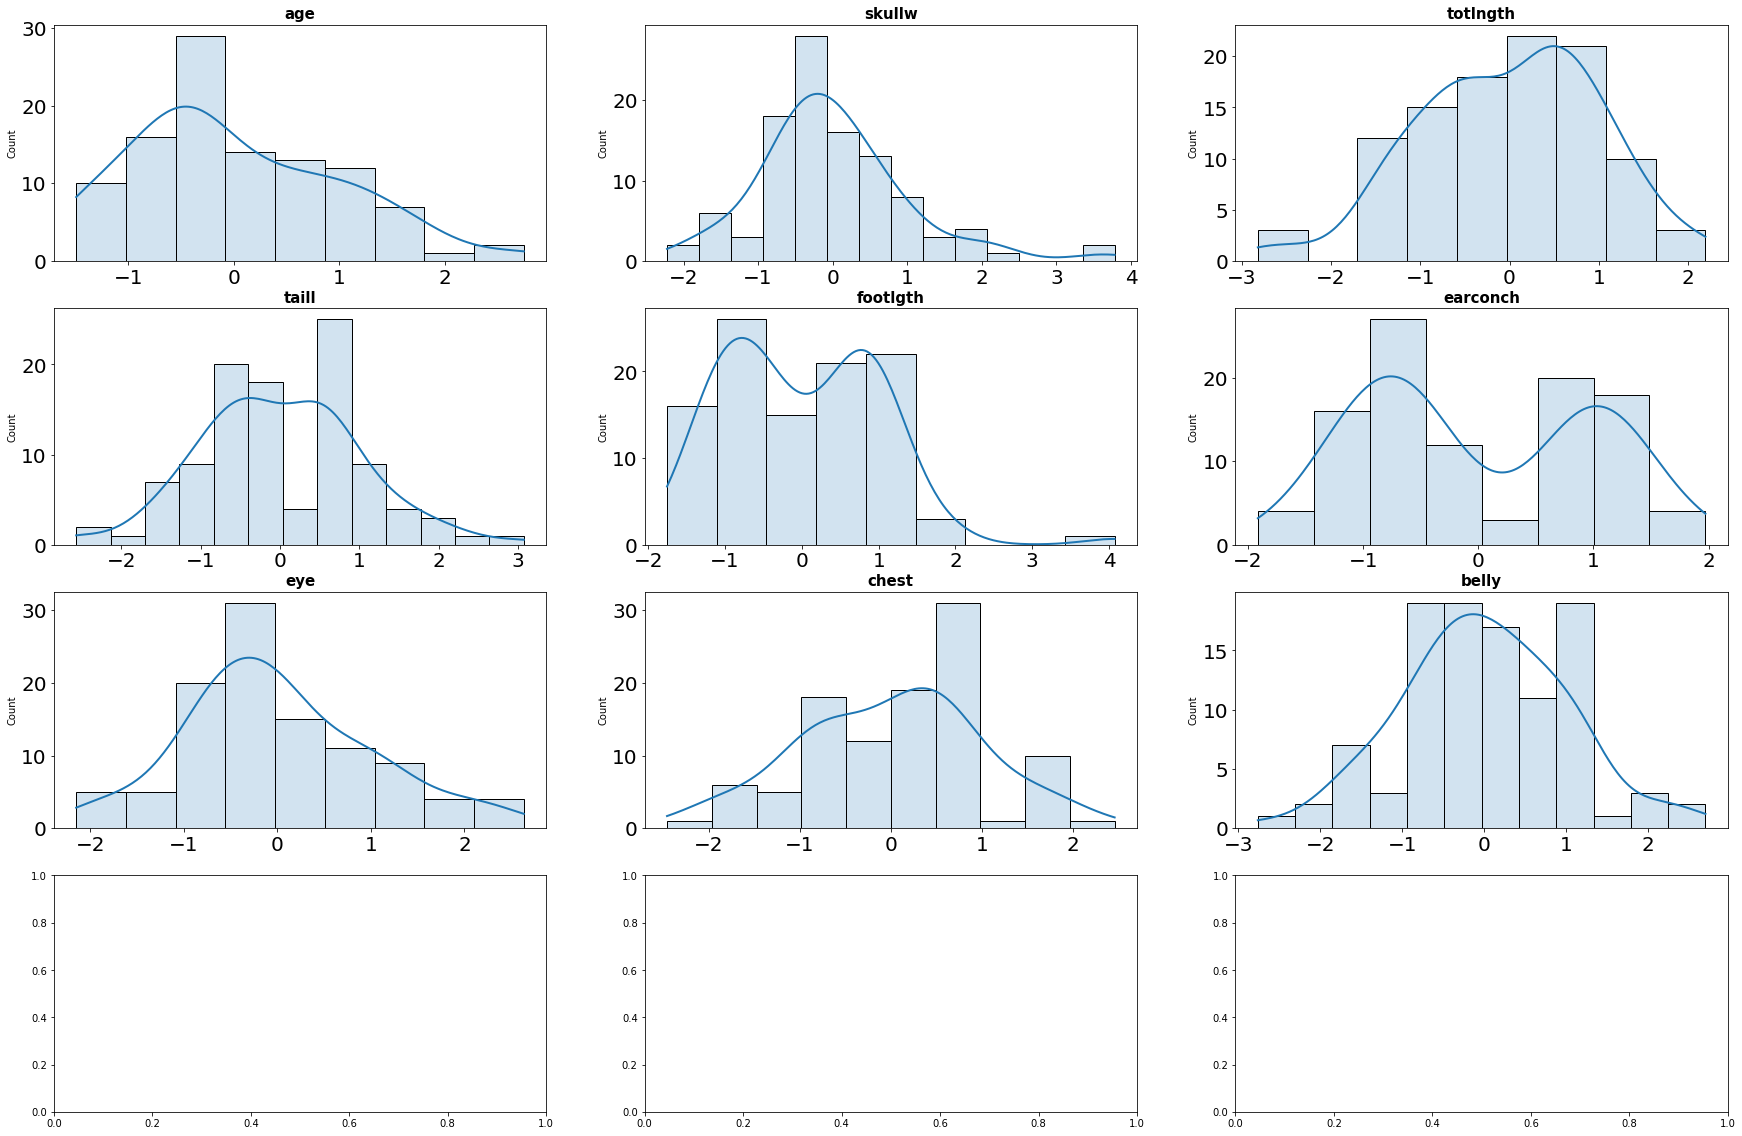

In [10]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (30, 20))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


In [11]:
df[numericas_estandar.columns] = numericas_estandar
df


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,2.218955,94.1,1.134883,0.445603,-0.517732,1.231614,1.557431,0.147177,0.491222,1.241874
1,2,1,Vic,f,1.157937,92.5,0.231197,1.028384,-0.261331,0.810757,0.750501,0.912499,0.736833,0.150424
2,3,1,Vic,f,1.157937,94.0,1.005785,1.960834,1.020671,1.421000,0.921668,0.434173,1.473667,0.514241
3,4,1,Vic,f,1.157937,93.2,0.069825,1.144941,0.507870,1.568300,0.995025,0.147177,0.491222,0.514241
4,5,1,Vic,f,-0.964098,91.5,-0.188371,-0.370290,-0.517732,0.495114,1.239549,0.051512,0.736833,0.150424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,-1.494606,89.5,-0.285195,-1.302740,-0.261331,-0.557029,-0.325405,-0.235484,-1.964889,-2.032475
100,101,7,other,m,-1.494606,88.6,-0.704763,-1.069627,1.020671,-0.893715,-0.031976,-1.000805,-0.982445,0.150424
101,102,7,other,f,1.157937,92.4,-0.607940,0.445603,0.507870,-1.083100,-0.667739,-1.957457,-0.982445,-0.941025
102,103,7,other,m,0.096920,91.5,-0.543391,-1.069627,-0.261331,-1.209358,-0.545477,0.338508,-0.982445,-1.304842


In [12]:
df.to_csv("Datos/possum_esta.csv")